In [1]:
import pandas as pd

In [2]:
# Data preprocessing for machine learning

In [3]:
# Handling Missing Values -> Dropping row, column, imputation with mean or median
# One Hot Encoding
# Outliers Handling
# NUmerical Scaling or Normalization
# Splitting the dataset into train and test

In [4]:
df = pd.read_csv("Titanic-Dataset.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(891, 12)

In [8]:
df[df.isna()].count()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.drop(columns=['Cabin'], inplace=True)

In [11]:
df.loc[df['Age'].isna(), 'Age'] = df['Age'].median()

In [12]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [13]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [19]:
df.loc[df['Embarked'].isna(), 'Embarked'] = df['Embarked'].mode()[0]

In [20]:
df.loc[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [29]:
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=False)

In [33]:
df_encoded[['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']] = df_encoded[[
    'Sex_female', 
    'Sex_male', 
    'Embarked_C', 
    'Embarked_Q', 
    'Embarked_S'
]].astype(int)

In [34]:
df_encoded

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,0,1,1,0,0


In [ ]:
# Outliers
# 10000 -> 9000, under 21, 999, 22- 25, 1 - 98
# Best way to view the outliers -> Box Plot

In [35]:
import matplotlib.pyplot as plt

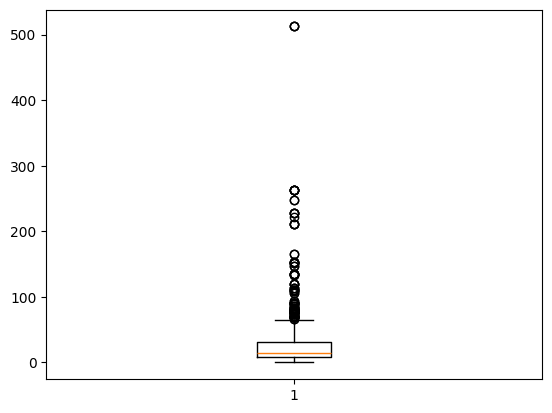

In [37]:
plt.boxplot(df['Fare'])
plt.show()

In [39]:
df_encoded[df_encoded['Fare'] > 200]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
27,28,0,1,"Fortune, Mr. Charles Alexander",19.0,3,2,19950,263.0000,0,1,0,0,1
88,89,1,1,"Fortune, Miss. Mabel Helen",23.0,3,2,19950,263.0000,1,0,0,0,1
118,119,0,1,"Baxter, Mr. Quigg Edmond",24.0,0,1,PC 17558,247.5208,0,1,1,0,0
258,259,1,1,"Ward, Miss. Anna",35.0,0,0,PC 17755,512.3292,1,0,1,0,0
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",50.0,0,1,PC 17558,247.5208,1,0,1,0,0
311,312,1,1,"Ryerson, Miss. Emily Borie",18.0,2,2,PC 17608,262.3750,1,0,1,0,0
341,342,1,1,"Fortune, Miss. Alice Elizabeth",24.0,3,2,19950,263.0000,1,0,0,0,1
377,378,0,1,"Widener, Mr. Harry Elkins",27.0,0,2,113503,211.5000,0,1,1,0,0
380,381,1,1,"Bidois, Miss. Rosalie",42.0,0,0,PC 17757,227.5250,1,0,1,0,0
438,439,0,1,"Fortune, Mr. Mark",64.0,1,4,19950,263.0000,0,1,0,0,1


In [46]:
# Inter Quartile Range -> Check for the outliers numerically
q1 = df_encoded['Fare'].quantile(0.25)
q3 = df_encoded['Fare'].quantile(0.75)
iqr = q3 - q1

lower = q1 - (1.5 * iqr)
upper = q3 + (1.5 * iqr)

display(q1)
display(q3)
display(lower)
display(upper)

outliers = df_encoded[(df_encoded['Fare'] < 0) | (df_encoded['Fare'] > upper)]

np.float64(7.9104)

np.float64(31.0)

np.float64(-26.724)

np.float64(65.6344)

In [47]:
outliers

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
27,28,0,1,"Fortune, Mr. Charles Alexander",19.0,3,2,19950,263.0000,0,1,0,0,1
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",28.0,1,0,PC 17569,146.5208,1,0,1,0,0
34,35,0,1,"Meyer, Mr. Edgar Joseph",28.0,1,0,PC 17604,82.1708,0,1,1,0,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",49.0,1,0,PC 17572,76.7292,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",28.0,8,2,CA. 2343,69.5500,0,1,0,0,1
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",28.0,1,0,17453,89.1042,1,0,1,0,0
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",45.0,1,1,36928,164.8667,1,0,0,0,1
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",28.0,8,2,CA. 2343,69.5500,1,0,0,0,1


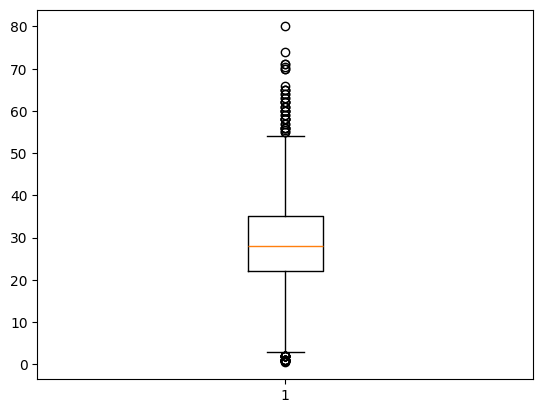

In [48]:
plt.boxplot(df_encoded['Age'])
plt.show()

In [51]:
df_encoded['Age'] = df_encoded['Age'].round(0)

In [52]:
df_encoded['Age'].min()

np.float64(0.0)

In [53]:
df['Age'].describe()

count    891.000000
mean      29.356902
std       13.017814
min        0.000000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

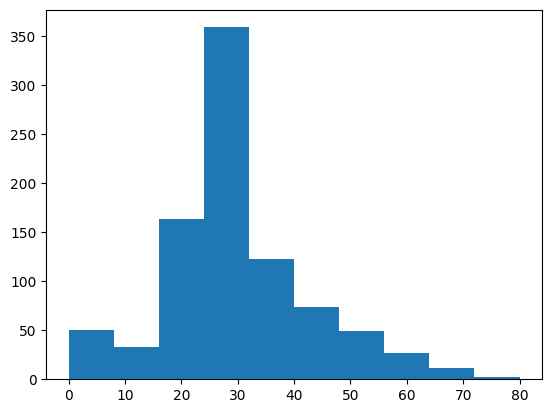

In [54]:
plt.hist(df['Age'])
plt.show()

In [55]:
df_encoded

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,0,1,1,0,0


In [58]:
final_df = df_encoded.drop(columns=['Name', 'Ticket', 'PassengerId'])

In [59]:
final_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [60]:
# Dropping row
final_df = final_df.drop(1)

In [61]:
final_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
5,0,3,28.0,0,0,8.4583,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0
